In [6]:
%matplotlib inline
import numpy as np
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('seaborn-whitegrid')

In [7]:
data = pd.read_csv('sim_catalog')
data_train = data[:10000].drop(columns = ['stype','name_s'])
data_test = data[10000:].drop(columns = ['stype','name_s'])
data_train["habitable"] = data_train["habitable"].astype(int)
data_test["habitable"] = data_test["habitable"].astype(int)

#data_hab = data_train[data_train['habitable'] == True].drop(columns = ['habitable', 'detected'])
#data_nothab = data_train[data_train['habitable'] == False].drop(columns = ['habitable', 'detected'])

In [8]:
model = GaussianNB()
model.fit(data_train.drop(columns = ['habitable']), data_train['habitable']);

data_pred = model.predict(data_test.drop(columns = ['habitable']))

results = data_test.copy().filter(['habitable'], axis=1)
results.insert(0, "habitable_pred", data_pred)
print(results)


#sns.heatmap(data_pred, data_test['habitable'], square=True, annot=True, fmt='d', cbar=False,
 #           cmap='Blues')
#plt.scatter(data_pred, data_test['habitable'])

       habitable_pred  habitable
10000               0          0
10001               0          0
10002               1          0
10003               0          0
10004               0          0
...               ...        ...
13999               1          1
14000               1          0
14001               1          1
14002               1          0
14003               1          0

[4004 rows x 2 columns]


<AxesSubplot:xlabel='habitable_pred', ylabel='habitable'>

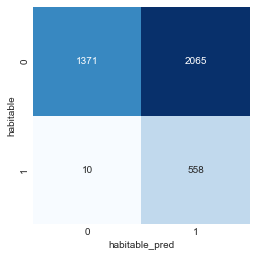

In [9]:
confusion_matrix = pd.crosstab(results['habitable'], results['habitable_pred'])
sns.heatmap(confusion_matrix, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=confusion_matrix.columns.values, yticklabels=confusion_matrix.columns.values,
            cmap='Blues')

In this case, almost all of the data from LIFESim is used to predict the habitability of a planet. As we can see, the results are not very promising. The only data that was excluded from the fitting was the non-number data, namely the star type and the star name. I believe the confusion happens because a lot of the dimensions of the data are not really physically relevant for the planets habitability. Maybe with a more rigourus selection of data columns this result can be improved. Let's try:

In [10]:
data_train_new = data[:10000].filter(['radius_p', 'semimajor_p', 'temp_p', 'habitable'], axis = 1)
data_test_new = data[10000:].filter(['radius_p','semimajor_p', 'temp_p', 'habitable'], axis = 1)
data_train_new["habitable"] = data_train_new["habitable"].astype(int)
data_test_new["habitable"] = data_test_new["habitable"].astype(int)

In [11]:
model = GaussianNB()
model.fit(data_train_new.drop(columns = ['habitable']), data_train_new['habitable']);

data_pred_new = model.predict(data_test_new.drop(columns = ['habitable']))

results_new = data_test_new.copy().filter(['habitable'], axis=1)
results_new.insert(0, "habitable_pred", data_pred_new)
print(results_new)

       habitable_pred  habitable
10000               0          0
10001               0          0
10002               0          0
10003               0          0
10004               0          0
...               ...        ...
13999               1          1
14000               0          0
14001               1          1
14002               0          0
14003               0          0

[4004 rows x 2 columns]


<AxesSubplot:xlabel='habitable_pred', ylabel='habitable'>

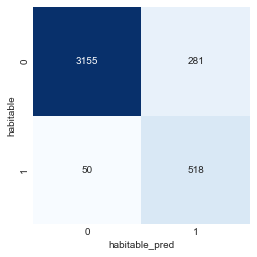

In [12]:
confusion_matrix = pd.crosstab(results_new['habitable'], results_new['habitable_pred'])
sns.heatmap(confusion_matrix, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=confusion_matrix.columns.values, yticklabels=confusion_matrix.columns.values,
            cmap='Blues')

Of course, this selection where the parameters were carefully chosen by physical relevance and some trial and error produses much better results. 